In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.cluster import KMeans
# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("Segmentation.csv")

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.drop("CUST_ID",axis=1,inplace=True)

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot:>

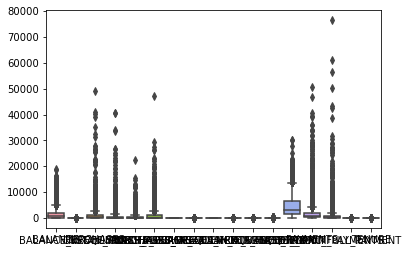

In [7]:
sns.boxplot(data=df)

In [8]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.01))
    return x

df=df.apply(outlier_capping)

In [9]:
df["CREDIT_LIMIT"]=df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

<AxesSubplot:>

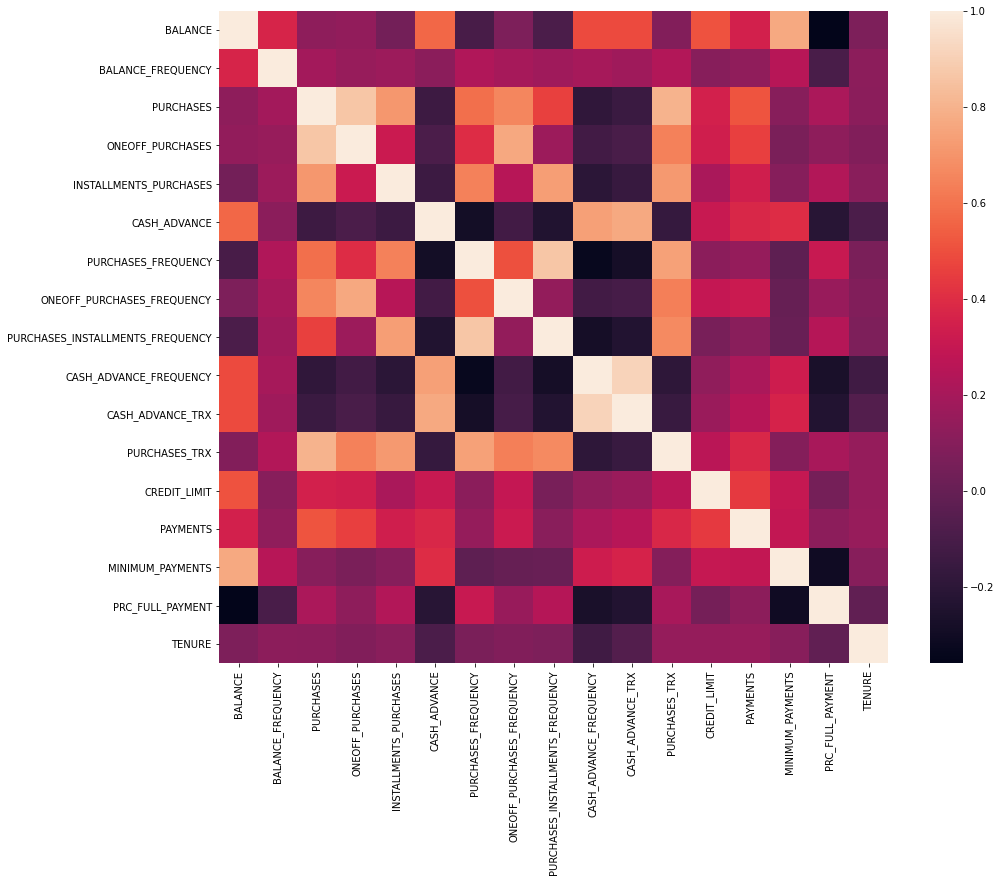

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 12
plt.rcParams['axes.grid'] = True
sns.heatmap(df.corr(),annot=False)

# Applying Standard scaler

In [12]:
std_scale = StandardScaler()
df_scaled = std_scale.fit_transform(df)

In [42]:
df_scaled

array([[-0.83551322, -0.25596817, -0.66238867, ..., -0.70166114,
        -0.52555097,  0.36067954],
       [ 1.03627509,  0.13250091, -0.74913553, ...,  0.60101164,
         0.2342269 ,  0.36067954],
       [ 0.617511  ,  0.52096999, -0.04609497, ..., -0.02049638,
        -0.52555097,  0.36067954],
       ...,
       [-0.84587523, -0.19122546, -0.61783315, ..., -0.78138778,
         0.32919999, -4.12276757],
       [-0.85176081, -0.19122546, -0.74913553, ..., -0.81862159,
         0.32919999, -4.12276757],
       [-0.6390685 , -0.90341664,  0.24495256, ..., -0.77318966,
        -0.52555097, -4.12276757]])

# Applying Pca


In [13]:
pc = PCA(n_components=17)
pc.fit(df_scaled)

PCA(n_components=17)

In [14]:
pc.explained_variance_

array([5.23347525, 3.99356282, 1.50078672, 1.26714614, 1.05779162,
       0.88307643, 0.72060467, 0.57288288, 0.49092693, 0.38033737,
       0.23274831, 0.22515351, 0.16389162, 0.1391196 , 0.07624389,
       0.04386478, 0.02028711])

In [15]:
var= pc.explained_variance_ratio_
var

array([0.30781709, 0.23488921, 0.08827171, 0.07452968, 0.06221608,
       0.05193987, 0.04238377, 0.03369523, 0.02887483, 0.02237029,
       0.01368955, 0.01324284, 0.00963961, 0.00818259, 0.00448443,
       0.00257999, 0.00119323])

In [16]:
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [17]:
df1=pd.DataFrame({"eigen values":pc.explained_variance_,"explained variance":var1})
df1

,eigen values,explained variance
0,5.233475,30.78
1,3.993563,54.27
2,1.500787,63.10
3,1.267146,70.55
4,1.057792,76.77
5,0.883076,81.96
6,0.720605,86.20
7,0.572883,89.57
8,0.490927,92.46
9,0.380337,94.70


In [18]:
pc_final=PCA(n_components=4).fit(df_scaled)

In [19]:
pc_final.explained_variance_

array([5.23347525, 3.99356282, 1.50078672, 1.26714614])

In [20]:
reduced_var=pc_final.fit_transform(df_scaled)

In [21]:
reduced_var

array([[-1.68869023, -1.92994457,  0.15644971, -0.74398349],
       [-1.97937698,  2.72654113,  0.51358857,  0.36169551],
       [ 1.188075  ,  0.00689406,  1.4877357 , -1.58759174],
       ...,
       [-0.75183428, -2.45568829, -1.01497037,  2.21224815],
       [-2.54643904, -1.7442324 ,  0.37400714,  2.22792316],
       [-0.17314602, -0.79975959,  1.51784805,  2.36656376]])

In [22]:
reduced=pd.DataFrame(reduced_var,columns=["C1","C2","C3","C4"])
reduced

,C1,C2,C3,C4
0,-1.688690,-1.929945,0.156450,-0.743983
1,-1.979377,2.726541,0.513589,0.361696
2,1.188075,0.006894,1.487736,-1.587592
3,-0.633280,-0.206308,1.824868,-1.115672
4,-1.708852,-1.401146,0.283695,-1.116681
...,...,...,...,...
8945,-0.065011,-2.469750,-1.484044,2.603443
8946,-0.309382,-1.917229,-1.819175,1.588342
8947,-0.751834,-2.455688,-1.014970,2.212248
8948,-2.546439,-1.744232,0.374007,2.227923


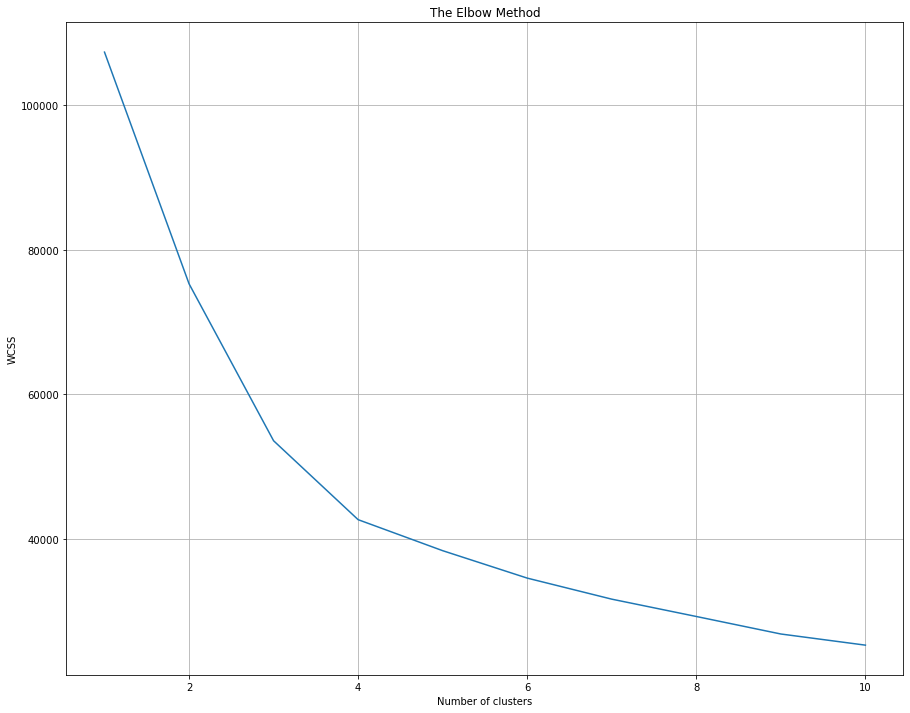

In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(reduced)
len(y_kmeans)

8950

In [25]:
df["clusters"]=kmeans.labels_

In [26]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,641.962032,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,641.962032,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [27]:
from sklearn import metrics
metrics.silhouette_score(df_scaled, kmeans.labels_)

0.1955289743173897

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

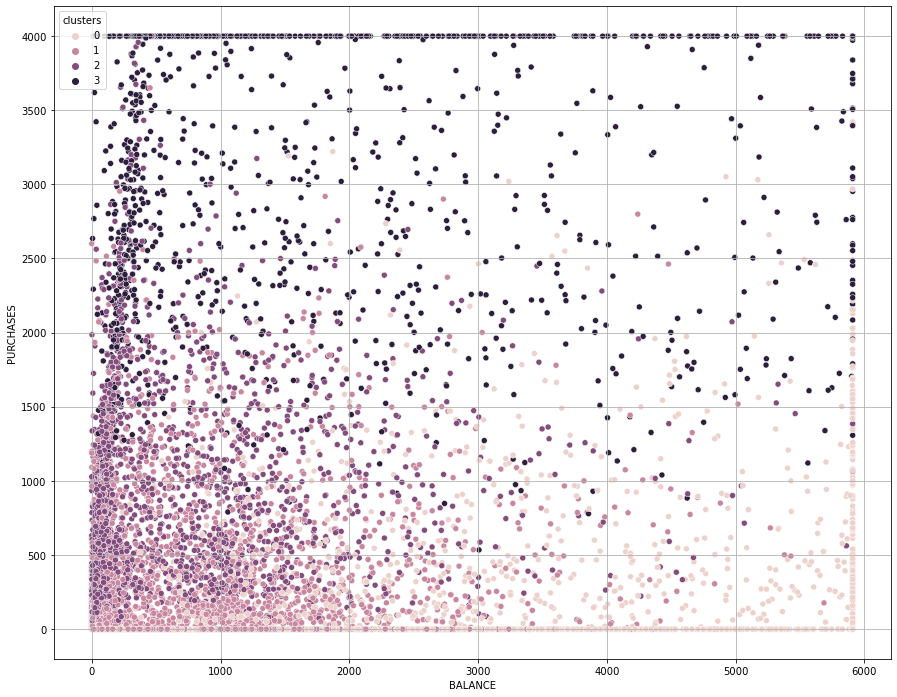

In [28]:
sns.scatterplot(x = 'BALANCE', y = 'PURCHASES', data = df, hue = 'clusters')

In [41]:
df.clusters.value_counts()

1    3682
2    2332
0    1657
3    1279
Name: clusters, dtype: int64

In [51]:
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

model = Pipeline(steps=[
    ('scaler', std_scale),
    ('pca', pc_final),
    ('ridge', kmeans)
])

dump(model, 'model.joblib')
model = load('model.joblib')

In [54]:
model.predict([[3202.467416,0.909091,0.00,0.00,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12]])[0]

0

In [60]:
cluster1=df[df["clusters"]==0]
cluster2=df[df["clusters"]==1]
cluster3=df[df["clusters"]==2]
cluster4=df[df["clusters"]==3]

In [61]:
cluster1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
1,3202.467416,0.909091,0.00,0.00,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
15,5909.111808,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,0
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,0
28,5909.111808,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.583333,15,8,10500.0,1601.448347,1648.851345,0.000000,12,0
32,5909.111808,1.000000,324.95,324.95,0.00,1189.533753,0.083333,0.083333,0.000000,0.166667,3,3,10500.0,1720.118876,2506.745366,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912,376.547421,0.857143,520.00,280.00,240.00,1178.402416,0.857143,0.142857,0.714286,0.583333,9,7,1000.0,929.415656,103.927887,0.200000,7,0
8914,181.891981,0.500000,0.00,0.00,0.00,1865.191764,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,4565.356495,88.057892,1.000000,6,0
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.583333,15,6,1000.0,143.118373,85.152441,0.000000,6,0
8917,1880.817982,1.000000,0.00,0.00,0.00,2335.949930,0.000000,0.000000,0.000000,0.333333,5,0,2500.0,221.568190,374.197621,0.000000,6,0


<AxesSubplot:xlabel='clusters', ylabel='PURCHASES'>

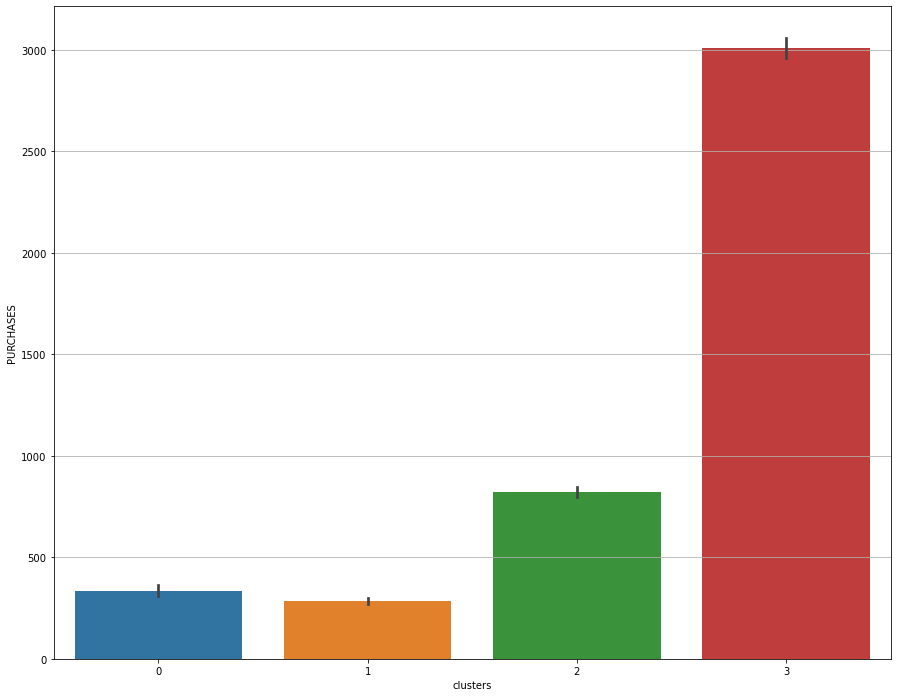

In [62]:
sns.barplot(x="clusters",y="PURCHASES",data=df)

<AxesSubplot:xlabel='clusters', ylabel='BALANCE'>

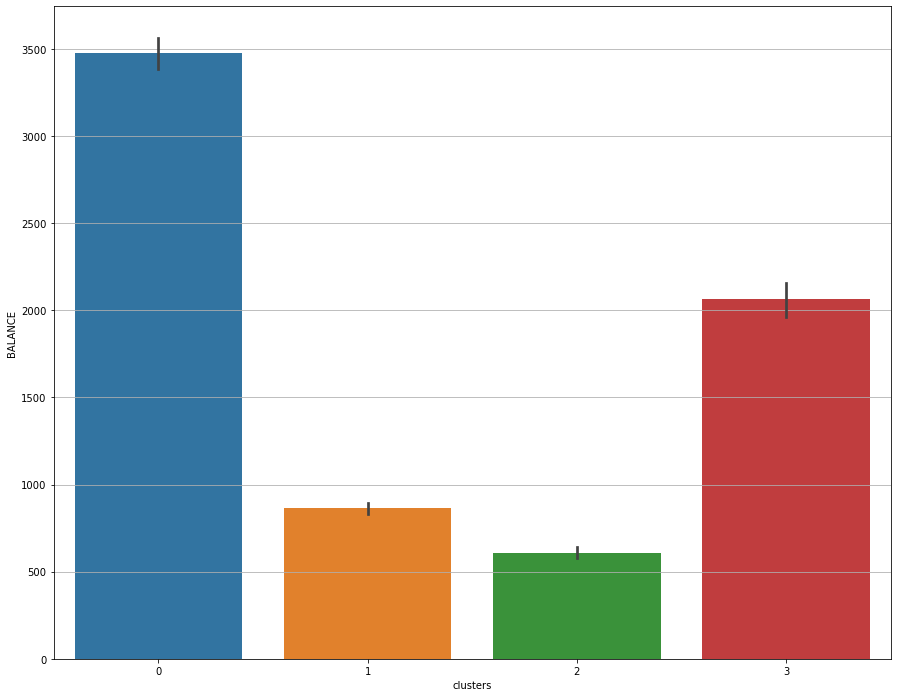

In [63]:
sns.barplot(x="clusters",y="BALANCE",data=df)

<AxesSubplot:xlabel='clusters', ylabel='INSTALLMENTS_PURCHASES'>

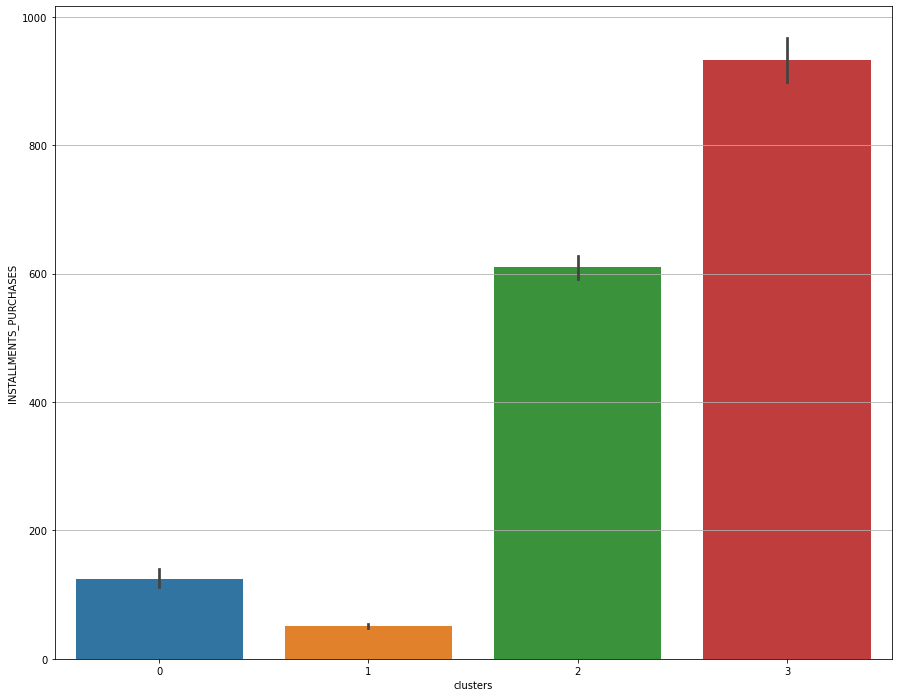

In [64]:
sns.barplot(x="clusters",y="INSTALLMENTS_PURCHASES",data=df)

<AxesSubplot:xlabel='clusters', ylabel='CREDIT_LIMIT'>

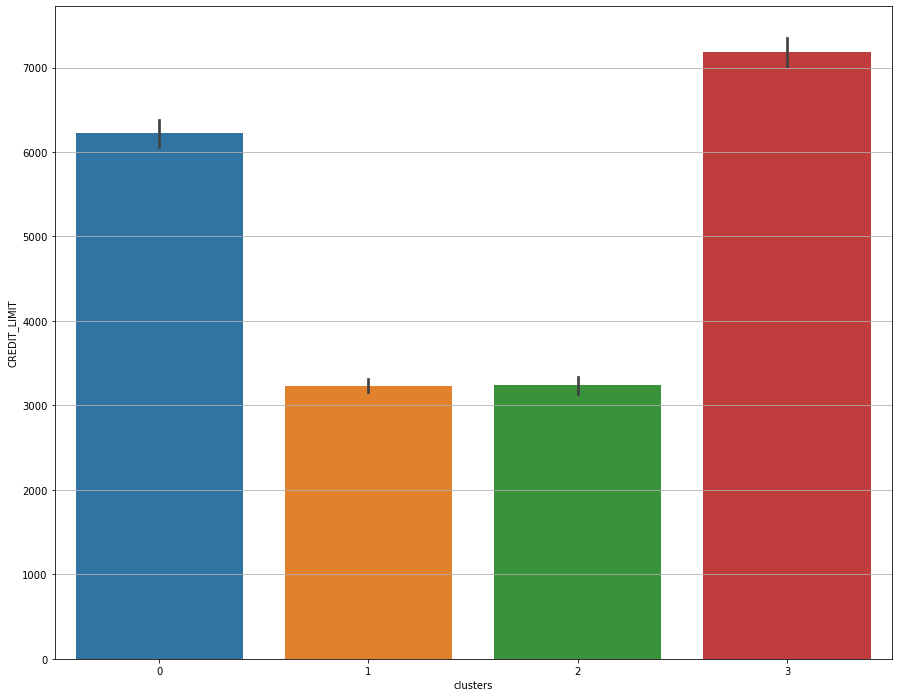

In [65]:
sns.barplot(x="clusters",y="CREDIT_LIMIT",data=df)

<AxesSubplot:xlabel='clusters', ylabel='PAYMENTS'>

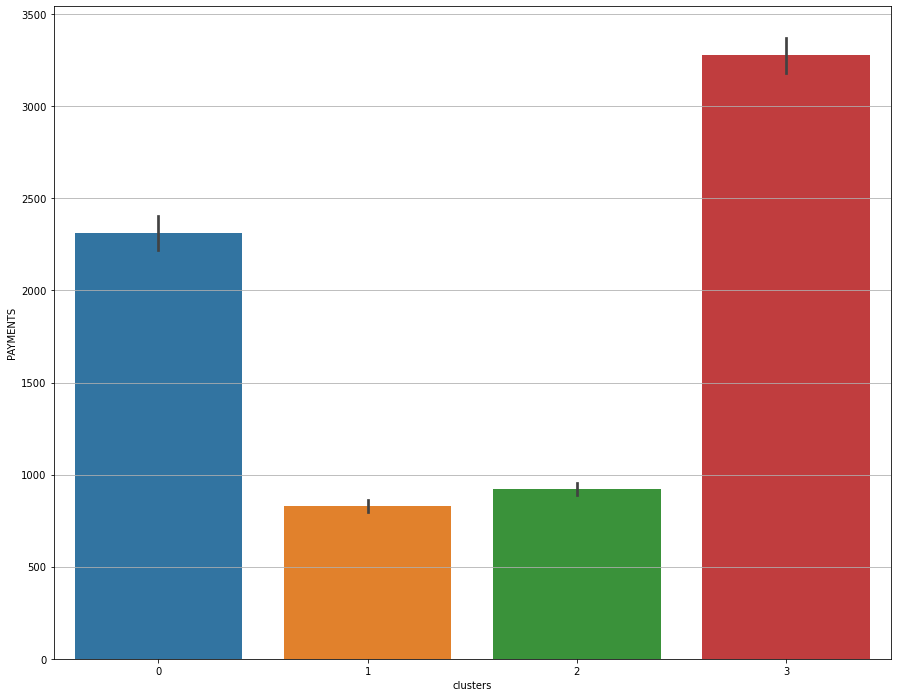

In [66]:
sns.barplot(x="clusters",y="PAYMENTS",data=df)

<AxesSubplot:xlabel='clusters', ylabel='TENURE'>

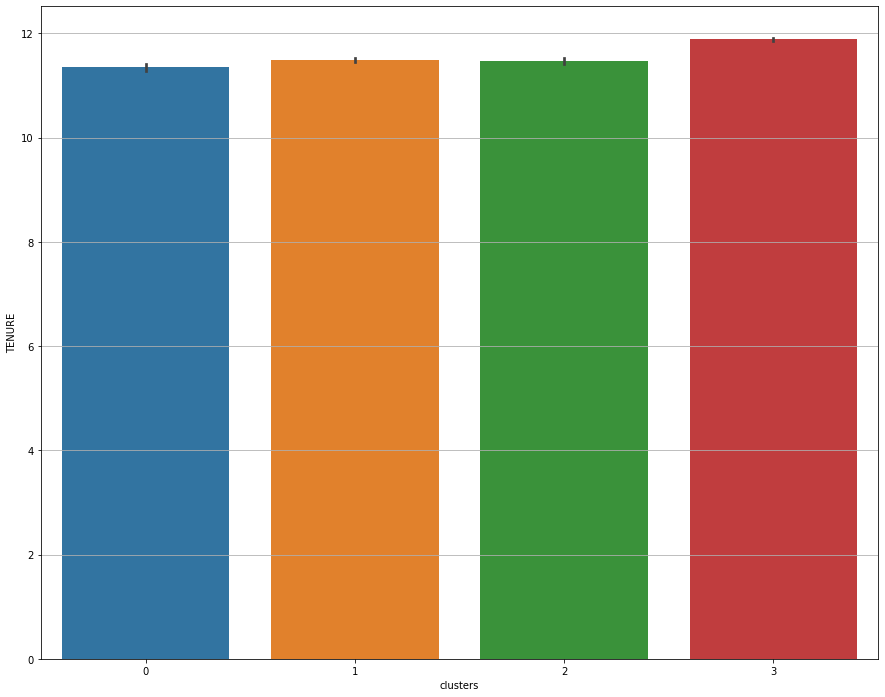

In [68]:
sns.barplot(x="clusters",y="TENURE",data=df)

<AxesSubplot:xlabel='clusters', ylabel='BALANCE_FREQUENCY'>

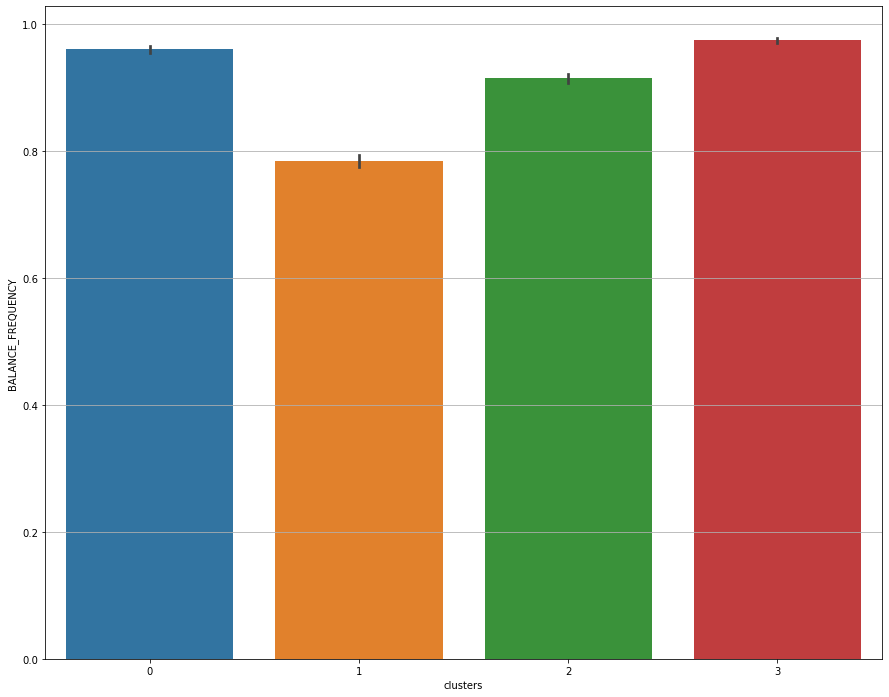

In [69]:
sns.barplot(x="clusters",y="BALANCE_FREQUENCY",data=df)

In [70]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'clusters'],
      dtype='object')

In [72]:
print("anbc\nf")

anbc
f
